### Deliverable 1: Preprocessing the Data for a Neural Network

In [54]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [55]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN','NAME'], 1)

In [56]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [57]:
# Look at APPLICATION_TYPE value counts for binning
application_count = application_df.APPLICATION_TYPE.value_counts()
application_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

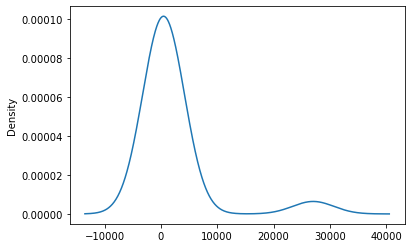

In [58]:
# Visualize the value counts of APPLICATION_TYPE
application_count.plot.density()

In [59]:
# Determine which values to replace if counts are less than ...?
#0-10000
#  Replcae Application less than 10000
replace_application = list(application_count[application_count < 1000].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [60]:
### Bin INCOME
income_amount_count = application_df["INCOME_AMT"].value_counts()
income_amount_count

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

<AxesSubplot:ylabel='Density'>

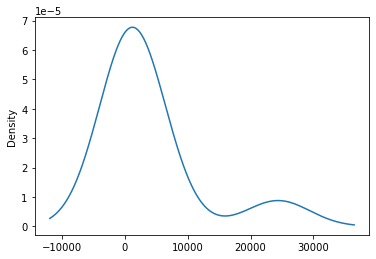

In [61]:
## Density Plot of Income
income_amount_count.plot.density()

In [62]:
replace_income_amt = list(income_amount_count[income_amount_count <200].index)

# Replace in dataframe
for app in replace_income_amt:
    application_df['INCOME_AMT'] = application_df['INCOME_AMT'].replace(app,"Other")
    
# Check to make sure binning was successful
application_df['INCOME_AMT'].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
Other              324
10M-50M            240
Name: INCOME_AMT, dtype: int64

In [63]:
## Bin ORGANIZATION
organization_count = application_df['ORGANIZATION'].value_counts()
organization_count

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

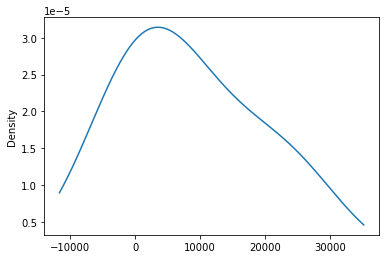

In [64]:
### Density Plot of Organization
organization_count.plot.density();

In [65]:
# Determine which values to replace if counts are less than ..?
replace_org = list(organization_count[organization_count <500].index)

# Replace in dataframe
for cls in replace_org:
    application_df['ORGANIZATION'] = application_df['ORGANIZATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['ORGANIZATION'].value_counts()

Trust          23515
Association    10255
Other            529
Name: ORGANIZATION, dtype: int64

In [66]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df.CLASSIFICATION.value_counts()
classification_count.head()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

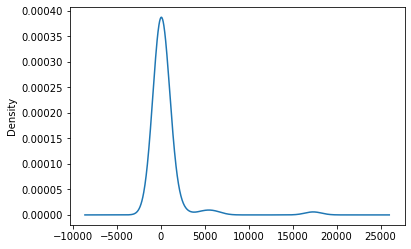

In [67]:
# Visualize the value counts of CLASSIFICATION
classification_count.plot.density()

In [68]:
# Determine which values to replace if counts are less than ..?
#  Less thank 2500
replace_class = list(classification_count[classification_count < 2500].index)
# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [69]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE          6
AFFILIATION               6
CLASSIFICATION            4
USE_CASE                  5
ORGANIZATION              3
INCOME_AMT                8
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [70]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [71]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [72]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(['IS_SUCCESSFUL', 'ASK_AMT'],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [73]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [87]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 50
hidden_nodes_layer4 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid")
)


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))





# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 100)               3600      
_________________________________________________________________
dense_34 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_35 (Dense)             (None, 50)                4050      
_________________________________________________________________
dense_36 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 11        
Total params: 16,251
Trainable params: 16,251
Non-trainable params: 0
_________________________________________________________________


In [88]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [89]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6170 - accuracy: 0.6968
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5736 - accuracy: 0.7254
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5716 - accuracy: 0.7175
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5686 - accuracy: 0.7259
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5632 - accuracy: 0.7250
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5673 - accuracy: 0.7233
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5688 - accuracy: 0.7216
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5889 - accuracy: 0.7073
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5699 - accuracy: 0.7221
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5653 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.5785 - accuracy: 0.7369
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5517 - accuracy: 0.7420
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5598 - accuracy: 0.7372
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5466 - accuracy: 0.7389
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5567 - accuracy: 0.7361
Epoch 86/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5524 - accuracy: 0.7376
Epoch 87/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5745 - accuracy: 0.7325
Epoch 88/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5791 - accuracy: 0.7322
Epoch 89/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5500 - accuracy: 0.7393
Epoch 90/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5502 - accuracy: 

In [86]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5711 - accuracy: 0.7261
Loss: 0.5710922479629517, Accuracy: 0.726064145565033


In [25]:
# Export model to HDF5 file
nn.save("AlphabetSoupCharity3.h5")

## Deliverable 3

In [26]:
# Remove Noisy Variables
# Additional neurons are added to hidden layers 
# Additional hidden layers are added
# The activation function of hidden layers or output layers is changed for optimization
# The model's weights are saved every 5 epochs
# The results are saved to an HDF5 file 